## Statistiques sur les passagers du Titanic


In [228]:
#importations
import pandas as pd
import matplotlib.pyplot as plt

#initialisation des variables
fichier_passagers = "./Data/Titanic/passengers.csv"
fichier_survie = "./Data/Titanic/survival.csv"

In [229]:
#récupération des dataframes
df_passagers = pd.read_csv(fichier_passagers, dtype={'Age': 'Float64'})
df_survie = pd.read_csv(fichier_survie, dtype={'Survived': 'boolean'})

display(df_passagers)
display(df_survie)

,PassengerId,Pclass,Name,Sex,Age,Fare
0,1,3,"Braund, Mr. Owen Harris",male,22.0,7.2500
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833
2,3,3,"Heikkinen, Miss. Laina",female,26.0,7.9250
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000
4,5,3,"Allen, Mr. William Henry",male,35.0,8.0500
...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,<NA>,8.0500
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,108.9000
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,7.2500
1307,1308,3,"Ware, Mr. Frederick",male,<NA>,8.0500


,PassengerId,Survived
0,1,False
1,2,True
2,3,True
3,4,True
4,5,False
...,...,...
1304,1305,False
1305,1306,True
1306,1307,False
1307,1308,False


In [230]:
# 1 - Joindre les 2 dataframes `df_passagers` et `df_survie`
#df_titanic = df_passagers.join(df_survie, lsuffix='PassengerId', rsuffix='PassengerId')
df_titanic = df_passagers.merge(df_survie, on='PassengerId', how='left')
df_titanic

,PassengerId,Pclass,Name,Sex,Age,Fare,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,True
2,3,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,True
4,5,3,"Allen, Mr. William Henry",male,35.0,8.0500,False
...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,<NA>,8.0500,False
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,108.9000,True
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,7.2500,False
1307,1308,3,"Ware, Mr. Frederick",male,<NA>,8.0500,False


<Axes: title={'center': 'Distribution des Prix'}, ylabel='Frequency'>

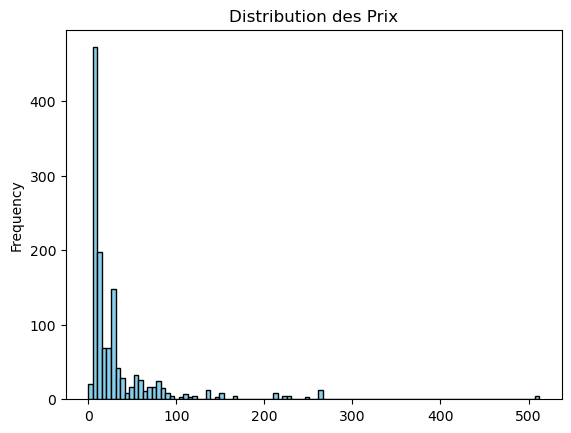

In [263]:
df_titanic['Fare'].plot(kind='hist', bins=100, title='Distribution des Prix', color='skyblue', edgecolor='black')

In [231]:
# 2 - Combien y a t-il de passagers dans notre dataframe ?
nb_passagers = len(df_titanic)
nb_passagers

1309

In [232]:
# 3 - Quelle est la moyenne du prix du trajet ?
moyenne_prix_trajet = df_titanic['Fare'].mean()
moyenne_prix_trajet

33.29547928134557

In [233]:
# 4 - Quels passagers ont payé les billets les plus chers ?
max_prix_trajet = df_titanic['Fare'].max()
df_passagers_ticket_le_plus_cher = df_titanic[df_titanic['Fare'] == max_prix_trajet]
df_passagers_ticket_le_plus_cher

,PassengerId,Pclass,Name,Sex,Age,Fare,Survived
258,259,1,"Ward, Miss. Anna",female,35.0,512.3292,True
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,512.3292,True
737,738,1,"Lesurer, Mr. Gustave J",male,35.0,512.3292,True
1234,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,512.3292,True


In [234]:
# 5 - Quelles personnes n’ont pas payé leurs billets de 1ère classe ?
df_passagers_billet_premiere_classe_gratuit = df_titanic[(df_titanic['Pclass'] == 1) & (df_titanic['Fare'] == 0)]
df_passagers_billet_premiere_classe_gratuit

,PassengerId,Pclass,Name,Sex,Age,Fare,Survived
263,264,1,"Harrison, Mr. William",male,40.0,0.0,False
633,634,1,"Parr, Mr. William Henry Marsh",male,<NA>,0.0,False
806,807,1,"Andrews, Mr. Thomas Jr",male,39.0,0.0,False
815,816,1,"Fry, Mr. Richard",male,<NA>,0.0,False
822,823,1,"Reuchlin, Jonkheer. John George",male,38.0,0.0,False
1157,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,<NA>,0.0,False
1263,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0.0,True


In [235]:
# 6 - Quelle personne a obtenu le billet de première classe le moins cher ?
df_titanic_classe1 = df_titanic[(df_titanic['Pclass'] == 1) & (df_titanic['Fare'] > 0)]
billet_classe_1_le_moins_cher = df_titanic_classe1['Fare'].min()
df_titanic_classe1[df_titanic_classe1['Fare'] == billet_classe_1_le_moins_cher]

,PassengerId,Pclass,Name,Sex,Age,Fare,Survived
872,873,1,"Carlsson, Mr. Frans Olof",male,33.0,5.0,False


In [236]:
# 7 - Quelle est la personne la plus jeune ? et la personne la plus âgée à bord du Titanic ?
min_age = df_titanic['Age'].min()
max_age = df_titanic['Age'].max()
df_passagers_les_plus_jeunes = df_titanic[df_titanic['Age'] == min_age]
df_passagers_les_plus_ages = df_titanic[df_titanic['Age'] == max_age]

print(f"La personne la plus jeune est: {df_passagers_les_plus_jeunes['Name'].iloc[0]}")
display(df_passagers_les_plus_jeunes)
print(f"La personne la plus agée est: {df_passagers_les_plus_ages['Name'].iloc[0]}")
display(df_passagers_les_plus_ages)

La personne la plus jeune est: Dean, Miss. Elizabeth Gladys Millvina""


,PassengerId,Pclass,Name,Sex,Age,Fare,Survived
1245,1246,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,20.575,True


La personne la plus agée est: Barkworth, Mr. Algernon Henry Wilson


,PassengerId,Pclass,Name,Sex,Age,Fare,Survived
630,631,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,30.0,True


In [237]:
# 8 - Quel est le prix médian des billets de 1ère, 2ème ou 3ème classe ?
df_prix_median_par_classe = df_titanic.groupby(by='Pclass').agg(prix_median=('Fare', 'median')).reset_index()
display(df_prix_median_par_classe)

,Pclass,prix_median
0,1,60.0000
1,2,15.0458
2,3,8.0500


In [238]:
#Autre solution
df_prix_median_par_classe = df_titanic.groupby(by='Pclass')['Fare'].median().reset_index(name="Prix médian")
display(df_prix_median_par_classe)

,Pclass,Prix médian
0,1,60.0000
1,2,15.0458
2,3,8.0500


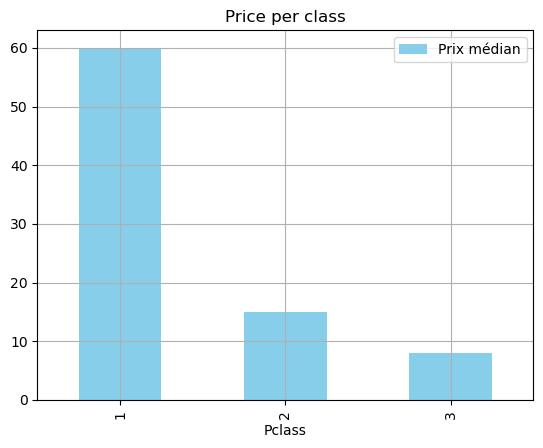

In [259]:
# Affichage du prix median par classe
df_prix_median_par_classe.plot(kind='bar', x='Pclass', y='Prix médian', color='skyblue', title='Price per class', grid=True)
plt.show()

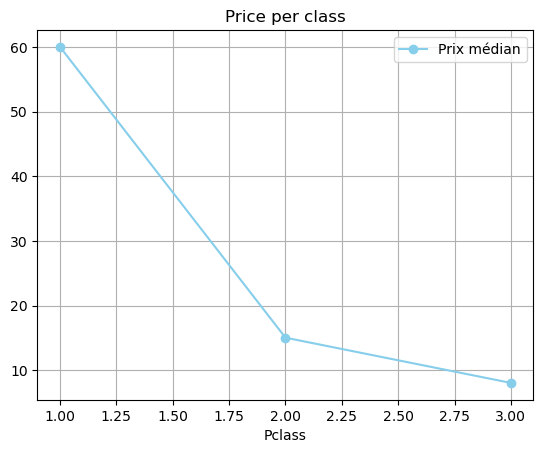

In [260]:
df_prix_median_par_classe.plot(kind='line', x='Pclass', y='Prix médian', marker='o', color='skyblue', title='Price per class', grid=True)
plt.show()

In [241]:
# 9 - Quel est le pourcentage de femmes dans la liste des passagers ?
df_passagers_par_genre = df_titanic.groupby(by='Sex').size().reset_index(name='count')
df_passagers_par_genre

,Sex,count
0,female,466
1,male,843


In [242]:
df_passagers_par_genre = df_titanic.groupby(by='Sex').agg(count=("PassengerId", "count")).reset_index()
df_passagers_par_genre

,Sex,count
0,female,466
1,male,843


In [243]:
nombre_total_passagers = len(df_titanic)
nombre_total_passagers

1309

In [244]:
# Quel est le pourcentage de femmes dans la liste des passagers ?
df_passagers_par_genre['percentage'] = 100*df_passagers_par_genre['count'] / nombre_total_passagers
df_passagers_par_genre

,Sex,count,percentage
0,female,466,35.599694
1,male,843,64.400306


In [245]:
#Autre manière avec la fonction apply
df_passagers_par_genre['percentage'] = df_passagers_par_genre['count'].apply(lambda nb:round(100*nb/nombre_total_passagers, 2))
df_passagers_par_genre

,Sex,count,percentage
0,female,466,35.6
1,male,843,64.4


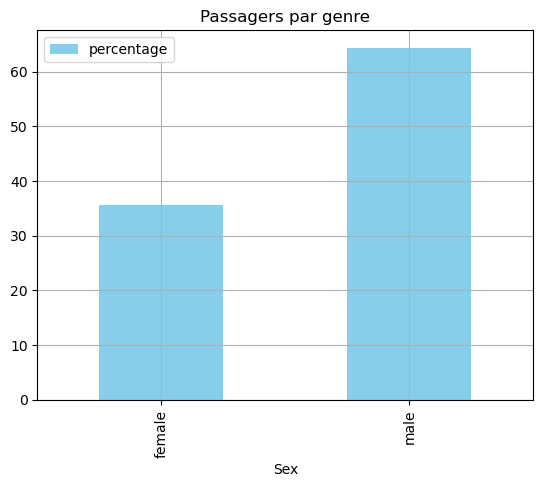

In [246]:
#Visualisation histogramme
df_passagers_par_genre.plot(kind='bar', x='Sex', y='percentage', color='skyblue', title='Passagers par genre', grid=True)
plt.show()

In [247]:
# 10 - Quelle est la proportion des survivants ?
df_passagers_par_survie = df_titanic.groupby(by='Survived').size().reset_index(name='count')
df_passagers_par_survie

,Survived,count
0,False,814
1,True,495


In [248]:
df_passagers_par_survie['Pourcentage survivants'] = 100*df_passagers_par_survie['count'] / nombre_total_passagers
df_passagers_par_survie

,Survived,count,Pourcentage survivants
0,False,814,62.184874
1,True,495,37.815126


In [249]:
df_passagers_par_survie['Pourcentage survivants'] = df_passagers_par_survie['count'] \
    .apply(lambda nb:round(100*nb / nombre_total_passagers,2))
df_passagers_par_survie

,Survived,count,Pourcentage survivants
0,False,814,62.18
1,True,495,37.82


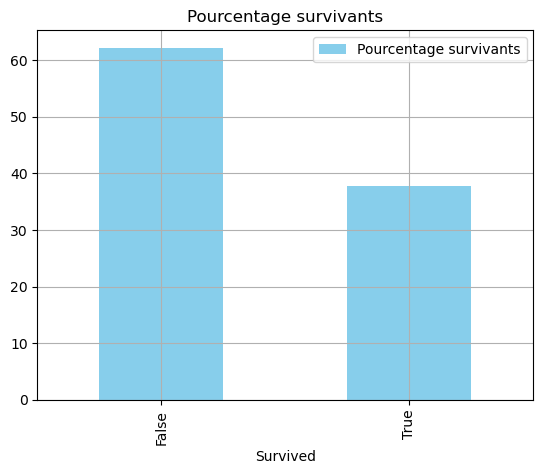

In [250]:
df_passagers_par_survie.plot(kind='bar', x='Survived', y='Pourcentage survivants', color='skyblue', title='Pourcentage survivants', grid=True)
plt.show()

In [251]:
# 11 - Quelle est la proportion des survivants par classe de transport ?
#df_passagers_survie_par_classe = df_titanic.groupby(by=['Pclass', 'Survived']).agg(count=("Pclass", "count")).reset_index()
df_passagers_survie_par_classe = df_titanic.groupby(by=['Pclass', 'Survived']).size().reset_index(name='nb')
df_passagers_survie_par_classe

,Pclass,Survived,nb
0,1,False,136
1,1,True,187
2,2,False,160
3,2,True,117
4,3,False,518
5,3,True,191


In [252]:
df_passagers_par_classe = df_titanic.groupby('Pclass').size().reset_index(name='nb')
df_passagers_par_classe

,Pclass,nb
0,1,323
1,2,277
2,3,709


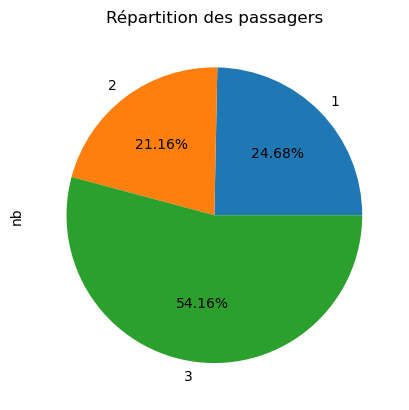

In [265]:
df_passagers_par_classe.set_index('Pclass')['nb'].plot(kind='pie', autopct='%.2f%%', title='Répartition des passagers')
plt.ylabel("nb")
plt.show()

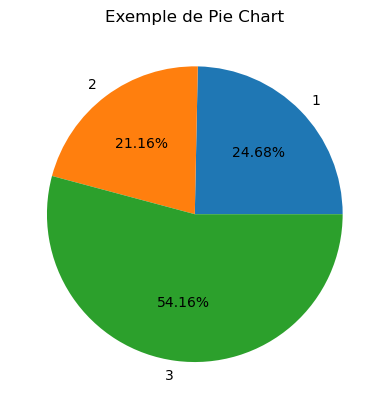

In [267]:
import numpy as np
import matplotlib.pyplot as plt

# Données pour le Pie Chart
labels = df_passagers_par_classe["Pclass"]
nb_passagers = df_passagers_par_classe["nb"]

# Tracer le Pie Chart
plt.pie(nb_passagers, labels=labels, autopct='%.2f%%')
plt.title('Exemple de Pie Chart')
plt.show()

In [253]:
df_passagers_par_classe[df_passagers_par_classe['Pclass'] == 3]["nb"].iloc[0]

709

In [254]:
#Calcul du pourcentage
def calculer_pourcentage(row):
    return 100*row['nb'] / df_passagers_par_classe[df_passagers_par_classe['Pclass'] == row['Pclass']]["nb"].iloc[0]

df_passagers_survie_par_classe['Pourcentage survie par classe'] = df_passagers_survie_par_classe.apply(calculer_pourcentage, axis="columns") 

df_passagers_survie_par_classe

,Pclass,Survived,nb,Pourcentage survie par classe
0,1,False,136,42.105263
1,1,True,187,57.894737
2,2,False,160,57.761733
3,2,True,117,42.238267
4,3,False,518,73.060649
5,3,True,191,26.939351


In [255]:
df_passagers_survie_par_classe.groupby('Pclass')['nb'].transform('sum')

0    323
1    323
2    277
3    277
4    709
5    709
Name: nb, dtype: int64

In [256]:
df_passagers_survie_par_classe["total_par_classe"] = df_passagers_survie_par_classe.groupby('Pclass')['nb'].transform('sum')
df_passagers_survie_par_classe

,Pclass,Survived,nb,Pourcentage survie par classe,total_par_classe
0,1,False,136,42.105263,323
1,1,True,187,57.894737,323
2,2,False,160,57.761733,277
3,2,True,117,42.238267,277
4,3,False,518,73.060649,709
5,3,True,191,26.939351,709


In [257]:
df_passagers_survie_par_classe["pourcentage"] = df_passagers_survie_par_classe \
    .apply(lambda row: 100*row['nb'] / row['total_par_classe'], axis="columns")
df_passagers_survie_par_classe

,Pclass,Survived,nb,Pourcentage survie par classe,total_par_classe,pourcentage
0,1,False,136,42.105263,323,42.105263
1,1,True,187,57.894737,323,57.894737
2,2,False,160,57.761733,277,57.761733
3,2,True,117,42.238267,277,42.238267
4,3,False,518,73.060649,709,73.060649
5,3,True,191,26.939351,709,26.939351


In [258]:
#autre méthode
df_passagers_survie_par_classe['pourcentage 2'] = 100 * df_passagers_survie_par_classe['nb'] / df_passagers_survie_par_classe.groupby('Pclass')['nb'].transform('sum')
df_passagers_survie_par_classe

,Pclass,Survived,nb,Pourcentage survie par classe,total_par_classe,pourcentage,pourcentage 2
0,1,False,136,42.105263,323,42.105263,42.105263
1,1,True,187,57.894737,323,57.894737,57.894737
2,2,False,160,57.761733,277,57.761733,57.761733
3,2,True,117,42.238267,277,42.238267,42.238267
4,3,False,518,73.060649,709,73.060649,73.060649
5,3,True,191,26.939351,709,26.939351,26.939351


In [ ]:
df_passagers_survie_par_classe[df_passagers_survie_par_classe['Survived'] == True].plot(kind='bar', x='Pclass', y='Pourcentage survie par classe', color='skyblue', title='Pourcentage survivants', grid=True)
plt.xticks(rotation=0)
plt.show()